# TODO LIST
1. One genre per song
2. split train and test
3. 

# Import packages and config

In [ ]:
!pip install pandas-profiling==2.7.1

     |████████████████████████████████| 252 kB 13.3 MB/s 
     |████████████████████████████████| 675 kB 40.4 MB/s 
     |████████████████████████████████| 4.7 MB 33.3 MB/s 
     |████████████████████████████████| 58 kB 3.2 MB/s 
     |████████████████████████████████| 812 kB 35.7 MB/s 
     |████████████████████████████████| 28.5 MB 55 kB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=941ccee79611bdb1b1d056ae4411b5104ea5a9404e5f31ea865e61270585e20e
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e9950d201a26d0bd3ee8655
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295207 sha256=801389ece2aca4fadd16984b55e130097aaf39aa6171b6429cd5e0ba12965118
  Stored in directory: /root/.cache/pip/wheels/4c/d5/59/5e3e297533ddb09407769762985d134135064c6831e29a914e
Successfully built htmlmin imagehash
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstallin

In [ ]:
## General packages
import pandas as pd
import numpy as np
import os
import math
from google.colab import drive
from pandas_profiling import ProfileReport
import matplotlib as mpl
import matplotlib.pyplot as plt

## Machine learning packages
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score, silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV   #####Revisar esta librería.
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans 
from sklearn import svm
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score,precision_score,  classification_report
from sklearn import tree

from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

## Neural networks packages
from keras import layers, models
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model

## Validacion
from sklearn.pipeline import Pipeline, FeatureUnion

In [ ]:
drive.mount('/content/drive', force_remount= True)
#os.chdir('/content/drive/MyDrive/Asesoftware/Plan semilla/ML Challenge') 
os.chdir('/content/drive/MyDrive/ML Challenge') #Thomas
os.listdir("./")

Mounted at /content/drive


['data',
 'results',
 'Examples',
 'model.png',
 'requirements.txt',
 'Data_tree.csv',
 'Labels_tree.csv',
 'NeuralNetwork.ipynb',
 'Logistic_regression.ipynb',
 'K-MEANS.ipynb',
 'logistic_regression.pkl',
 'Copy of Logistic_regression.ipynb',
 'Spotify challenge.ipynb',
 'SVM.ipynb']

In [ ]:
DATA_PATH = './data/'
RESULTS_PATH = './results/'

In [ ]:
os.listdir(DATA_PATH)

['songs_genres.csv',
 'final_data.csv',
 'Datos_no_st.csv',
 'data_standarScaler.csv',
 'songs_genres.gsheet',
 'standirezed_data.csv',
 'example 0.png',
 'example 1.png',
 'example 2.png',
 'example 3.png',
 'example 4.png',
 'example 5.png',
 'example 6.png',
 'example 7.png',
 'example 8.png',
 'example 9.png',
 'example 10.png',
 'example 11.png',
 'example 12.png',
 'example 13.png',
 'example 14.png',
 'example 15.png',
 'example 16.png',
 'example 17.png',
 'example 18.png',
 'example 19.png',
 'example 20.png',
 'example 21.png',
 'example 22.png',
 'example 23.png',
 'example 24.png',
 'NEW_DATA_X.csv',
 'NEW_DATA_Y.csv',
 'data_standardScaler.csv',
 'data_k_means_graphics.csv']

# Data preprocessing

In [ ]:
songs_genres = pd.read_csv(DATA_PATH+"songs_genres.csv")
df = pd.read_csv(DATA_PATH+"final_data.csv", index_col = False)

songs_genres.genre_id.unique()
songs_genres.drop_duplicates(inplace=True)
songs_genres = shuffle(songs_genres)

print(songs_genres.value_counts().sum())
songs_genres.drop_duplicates(subset=['track_id'],keep='first',inplace=True)
## TODO plot the distribution
print(songs_genres.genre_id.value_counts())
print(songs_genres.value_counts().sum())

df = df[['artist', 'artist_id', 'track_id', 'track_name', 'duration_ms', 'key','time_signature','mode_Major','mode_Minor', 'acousticness', 'instrumentalness', 'liveness',
       'loudness', 'tempo', 'speechiness', 'valence', 'modulation','singability', 'chillness', 'danceability', 'energy', 'popularity']]
df = df.merge(songs_genres, on='track_id').drop(['modulation','chillness'],axis=1)

227294
7.0     9674
25.0    8999
3.0     8743
21.0    8724
10.0    8721
6.0     8613
23.0    8444
26.0    8416
14.0    8285
20.0    8197
16.0    8079
4.0     8004
15.0    7647
8.0     7445
11.0    6362
24.0    6351
18.0    5034
9.0     4980
12.0    4831
13.0    4828
22.0    4543
2.0     4272
17.0    4215
19.0    4174
5.0     3666
1.0      119
Name: genre_id, dtype: int64
171366


In [ ]:
feature_correlation = df.corr()
feature_correlation.style.background_gradient(cmap='coolwarm')

,artist_id,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,genre_id
artist_id,1.000000,-0.008049,0.007832,0.002759,-0.077418,-0.011900,-0.028523,0.064371,0.030681,-0.043545,0.050191,-0.027812,0.027823,0.059230,0.039833,-0.001655
duration_ms,-0.008049,1.000000,-0.007466,-0.002240,0.024407,0.069009,0.016501,-0.048721,-0.027412,-0.013198,-0.129746,0.106397,-0.106401,-0.045724,-0.022998,-0.036107
mode_Major,0.007832,-0.007466,1.000000,-0.424276,0.002169,-0.052173,-0.002130,0.009244,0.012571,-0.022972,-0.002589,0.021019,-0.021025,-0.010488,0.050389,-0.022215
mode_Minor,0.002759,-0.002240,-0.424276,1.000000,-0.055745,0.025352,-0.025762,0.032454,-0.001078,0.010175,0.009101,-0.062918,0.062931,0.036754,0.089900,0.017243
acousticness,-0.077418,0.024407,0.002169,-0.055745,1.000000,0.309651,0.086098,-0.696575,-0.267401,0.176694,-0.370210,0.401265,-0.401266,-0.729403,-0.356298,-0.044532
instrumentalness,-0.011900,0.069009,-0.052173,0.025352,0.309651,1.000000,-0.164502,-0.506710,-0.110900,-0.193683,-0.338012,0.377970,-0.377974,-0.401677,-0.165201,0.043905
liveness,-0.028523,0.016501,-0.002130,-0.025762,0.086098,-0.164502,1.000000,0.055456,-0.061028,0.562108,0.014048,0.018190,-0.018185,0.207966,-0.190780,-0.132947
loudness,0.064371,-0.048721,0.009244,0.032454,-0.696575,-0.506710,0.055456,1.000000,0.250003,0.002809,0.439979,-0.475886,0.475889,0.825249,0.328561,-0.023026
tempo,0.030681,-0.027412,0.012571,-0.001078,-0.267401,-0.110900,-0.061028,0.250003,1.000000,-0.102992,0.156593,-0.047647,0.047657,0.247242,0.096841,-0.007428
speechiness,-0.043545,-0.013198,-0.022972,0.010175,0.176694,-0.193683,0.562108,0.002809,-0.102992,1.000000,0.023131,-0.136282,0.136279,0.167052,-0.177383,-0.186632


In [ ]:
df[df['instrumentalness']>1]

,artist,artist_id,track_id,track_name,duration_ms,key,time_signature,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,genre_id
94763,The Arrogant Sons Of Bitches,12396.0,6luidVWKHWkZDmChOiKCXh,Melon Country,155200,E,4/4,1,0,0.123,5.0,0.346,-1.721,100.215,0.209,0.69,0.547,0.453,0.987,14.0,23.0


In [ ]:
## Normalizar: [0,1] x/max(x), Estandarizar media=0 y varianza=1, formula = (x-mean)/std
## Remove negatives, normalize/estandarizar
## Negatives: loudness, chillness, popularity
##MAX(normalize) : duration_ms, artist_id, instrumentalness, loudness, tempo, popularity
df=df[df['instrumentalness']<1]

In [ ]:
# SCALE THE DATA
df[['duration_ms','instrumentalness','tempo', 'loudness', 'popularity']] = MinMaxScaler().fit_transform(df[['duration_ms','instrumentalness','tempo', 'loudness', 'popularity']])
df.describe()

,artist_id,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,genre_id
count,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.00000,171365.000000,171365.000000,171365.000000,171365.000000
mean,7109.532711,0.040373,0.398384,0.213737,0.398231,0.173144,0.226414,0.265707,0.104646,0.127715,0.444521,0.46387,0.536132,0.562068,0.596195,14.156730
std,4142.170936,0.023618,0.489567,0.409944,0.366278,0.323799,0.212667,0.040527,0.037972,0.205483,0.265596,0.18928,0.189280,0.276255,0.107923,7.375129
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009670,0.000000,0.000000,0.022200,0.000000,0.01300,0.056900,0.000020,0.000000,1.000000
25%,3671.000000,0.029938,0.000000,0.000000,0.042600,0.000000,0.097900,0.248951,0.074327,0.036800,0.216000,0.32200,0.411000,0.353000,0.522581,7.000000
50%,6838.000000,0.037151,0.000000,0.000000,0.274000,0.000077,0.131000,0.278307,0.102086,0.049300,0.431000,0.44700,0.553000,0.601000,0.600000,14.000000
75%,10612.000000,0.046038,1.000000,0.000000,0.786000,0.095295,0.280000,0.293998,0.130963,0.101000,0.657000,0.58900,0.678000,0.794000,0.670968,21.000000
max,14561.000000,1.000000,1.000000,1.000000,0.996000,1.000000,1.000000,1.000000,1.000000,0.967000,1.000000,0.94310,0.987000,0.999000,1.000000,26.000000


In [ ]:
df2 = pd.get_dummies(df.drop(['genre_id','artist','track_id','track_name'],axis=1))
df2.head(3)

,artist_id,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
0,1.0,0.038205,0,1,0.10800,0.001281,0.1590,0.286033,0.090019,0.0391,0.866,0.291,0.709,0.831,0.736774,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1,9.0,0.053122,1,0,0.01220,0.000000,0.2600,0.305562,0.139583,0.0930,0.517,0.424,0.576,0.967,0.661290,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,9.0,0.040700,1,0,0.00219,0.000003,0.0799,0.291169,0.079250,0.0647,0.454,0.334,0.666,0.793,0.632258,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
df2.to_csv(DATA_PATH+"standirezed_data.csv",index=False)

In [ ]:
df2.describe()

,artist_id,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
count,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.00000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000,171365.000000
mean,7109.532711,0.040373,0.398384,0.213737,0.398231,0.173144,0.226414,0.265707,0.104646,0.127715,0.444521,0.46387,0.536132,0.562068,0.596195,0.099227,0.067598,0.074052,0.116657,0.097027,0.104531,0.033542,0.075873,0.087480,0.065527,0.114615,0.063870,0.000035,0.013299,0.116803,0.844507,0.025355
std,4142.170936,0.023618,0.489567,0.409944,0.366278,0.323799,0.212667,0.040527,0.037972,0.205483,0.265596,0.18928,0.189280,0.276255,0.107923,0.298967,0.251056,0.261857,0.321013,0.295995,0.305949,0.180049,0.264796,0.282538,0.247454,0.318558,0.244521,0.005917,0.114553,0.321187,0.362375,0.157202
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009670,0.000000,0.000000,0.022200,0.000000,0.01300,0.056900,0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3671.000000,0.029938,0.000000,0.000000,0.042600,0.000000,0.097900,0.248951,0.074327,0.036800,0.216000,0.32200,0.411000,0.353000,0.522581,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,6838.000000,0.037151,0.000000,0.000000,0.274000,0.000077,0.131000,0.278307,0.102086,0.049300,0.431000,0.44700,0.553000,0.601000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,10612.000000,0.046038,1.000000,0.000000,0.786000,0.095295,0.280000,0.293998,0.130963,0.101000,0.657000,0.58900,0.678000,0.794000,0.670968,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,14561.000000,1.000000,1.000000,1.000000,0.996000,1.000000,1.000000,1.000000,1.000000,0.967000,1.000000,0.94310,0.987000,0.999000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
### Train test split FOR NUMERICAL ALGORITHMS: 20% test
X = df2
y = df['genre_id']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1234, stratify = y)

In [ ]:
X.shape

(171365, 32)

# Logisitc regression

#### Results (performance)

# SVM

In [ ]:
df1 = pd.read_csv(DATA_PATH+"data_standarScaler.csv", index_col = False)
df1.describe()

,duration_ms,mode_Major,mode_Minor,acousticness,instrumentalness,liveness,loudness,tempo,speechiness,valence,singability,danceability,energy,popularity,genre_id,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,time_signature_0/4,time_signature_1/4,time_signature_3/4,time_signature_4/4,time_signature_5/4
count,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05,1.713650e+05
mean,-2.504432e-16,-5.575427e-15,1.068886e-13,2.284190e-16,1.665426e-13,-8.211285e-16,7.955839e-15,7.633889e-16,-3.886800e-15,-1.908793e-15,-3.041755e-15,-2.896121e-15,4.908572e-15,7.380590e-14,1.434501e-13,9.787586e-15,1.488214e-14,8.477090e-14,-2.294823e-14,-6.847808e-14,-5.621650e-14,-8.716643e-15,3.707619e-15,2.288936e-14,-9.821600e-15,3.405319e-14,-1.076274e-14,-5.943657e-15,5.443218e-14,1.420097e-14,9.387969e-14,-5.489753e-14
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.709397e+00,-8.137497e-01,-5.213815e-01,-1.087238e+00,-5.347278e-01,-1.019176e+00,-6.556338e+00,-2.755835e+00,-5.134976e-01,-1.673677e+00,-2.382029e+00,-2.531872e+00,-2.034533e+00,-5.524303e+00,-1.784372e+00,-3.318996e-01,-2.692568e-01,-2.827981e-01,-3.634056e-01,-3.277996e-01,-3.416630e-01,-1.862970e-01,-2.865354e-01,-3.096229e-01,-2.648049e-01,-3.597946e-01,-2.612033e-01,-5.917281e-03,-1.160963e-01,-3.636628e-01,-2.330487e+00,-1.612912e-01
25%,-4.418111e-01,-8.137497e-01,-5.213815e-01,-9.709330e-01,-5.347278e-01,-6.042997e-01,-4.134424e-01,-7.984354e-01,-4.424452e-01,-8.604095e-01,-7.495237e-01,-6.610944e-01,-7.567955e-01,-6.821060e-01,-9.707154e-01,-3.318996e-01,-2.692568e-01,-2.827981e-01,-3.634056e-01,-3.277996e-01,-3.416630e-01,-1.862970e-01,-2.865354e-01,-3.096229e-01,-2.648049e-01,-3.597946e-01,-2.612033e-01,-5.917281e-03,-1.160963e-01,-3.636628e-01,4.290948e-01,-1.612912e-01
50%,-1.364469e-01,-8.137497e-01,-5.213815e-01,-3.391712e-01,-5.344907e-01,-4.486565e-01,3.109169e-01,-6.739400e-02,-3.816127e-01,-5.090716e-02,-8.912496e-02,8.911850e-02,1.409300e-01,3.525654e-02,-2.144950e-02,-3.318996e-01,-2.692568e-01,-2.827981e-01,-3.634056e-01,-3.277996e-01,-3.416630e-01,-1.862970e-01,-2.865354e-01,-3.096229e-01,-2.648049e-01,-3.597946e-01,-2.612033e-01,-5.917281e-03,-1.160963e-01,-3.636628e-01,4.290948e-01,-1.612912e-01
75%,2.398506e-01,1.228879e+00,-5.213815e-01,1.058677e+00,-2.404233e-01,2.519728e-01,6.980878e-01,6.930773e-01,-1.300093e-01,8.000116e-01,6.610880e-01,7.495172e-01,8.395632e-01,6.928388e-01,9.278164e-01,-3.318996e-01,-2.692568e-01,-2.827981e-01,-3.634056e-01,-3.277996e-01,-3.416630e-01,-1.862970e-01,-2.865354e-01,-3.096229e-01,-2.648049e-01,-3.597946e-01,-2.612033e-01,-5.917281e-03,-1.160963e-01,-3.636628e-01,4.290948e-01,-1.612912e-01
max,4.063044e+01,1.228879e+00,1.917981e+00,1.632013e+00,2.553614e+00,3.637564e+00,1.811877e+01,2.357910e+01,4.084468e+00,2.091450e+00,2.531866e+00,2.382023e+00,1.581635e+00,3.741630e+00,1.605863e+00,3.012959e+00,3.713926e+00,3.536091e+00,2.751746e+00,3.050644e+00,2.926861e+00,5.367772e+00,3.489971e+00,3.229736e+00,3.776365e+00,2.779363e+00,3.828436e+00,1.689965e+02,8.613540e+00,2.749800e+00,4.290948e-01,6.199967e+00


In [ ]:
### Train test split FOR NUMERICAL ALGORITHMS: 20% test
X = df1.drop('artist_id',axis=1)
y = df['genre_id']

KeyError: ignored

In [ ]:
#apply PCA to reduce the number of features to half its size
pca = PCA(n_components = 25)
principalComponents = pca.fit_transform(X)

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(principalComponents, y, test_size=0.8, random_state=1234, stratify = y)

In [ ]:
pipe = Pipeline([('clf', SVC(random_state=1234)),])
# tuneo 
#C, kernel y decision function shape
param_grid = dict(clf__C=[ 0.01,0.1,1],
                  clf__gamma = ['scale', 'auto'],
                  clf__class_weight=['balanced', None],
                  clf__decision_function_shape=['ovo', 'ovr'])

In [ ]:
grid_search = GridSearchCV(pipe, param_grid=param_grid,cv=5,verbose=3,scoring='accuracy')

# Se ajusta el modelo con las diferentes configuraciones
grid_search.fit(X_train1,y_train1)

print(grid_search.best_params_)
dump(grid_search.best_estimator_, 'SVC_model.joblib') 

svc_1 = load('SVC_model.joblib') 

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=scale 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=scale, score=0.072, total= 2.2min
[CV] clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=scale 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s


[CV]  clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=scale, score=0.060, total= 2.2min
[CV] clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=scale 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  4.4min remaining:    0.0s


[CV]  clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=scale, score=0.060, total= 2.1min
[CV] clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=scale 
[CV]  clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=scale, score=0.062, total= 2.1min
[CV] clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=scale 
[CV]  clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=scale, score=0.062, total= 2.2min
[CV] clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=auto 
[CV]  clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=auto, score=0.075, total= 1.9min
[CV] clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=auto 
[CV]  clf__C=0.01, clf__class_weight=balanced, clf__decision_function_shape=ovo, clf__gamma=auto, score=0.0

In [ ]:
# Create a model with the optimal hyperparameters
# that we obtained from the gridsearch

rbf = svm.SVC(kernel = 'rbf',C= 0.1, decision_function_shape ='ovr', gamma = 'auto', class_weight= 'balanced',  random_state=1234)
rbf.fit(X_train, y_train)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_rbf = rbf.score(X_test, y_test)
print(accuracy_rbf)

0.5341666374893502


#### Results (performance)

In [ ]:
y_pred = rbf.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)

# Decision Tree



In [ ]:
dot_data = tree.export_graphviz(alg1, out_file=None, 
                      feature_names=list(X_train1.columns),  
                      class_names=['0','1','2'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

#### Results performance

# Neuronal network

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(25,activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics = 'accuracy')

In [ ]:
model.summary()

In [ ]:
plot_model(model, to_file='model.png', show_shapes= True)

In [ ]:
#5 iteraciones, lotes de 128 unidades
model.fit(x_train, y_train, epochs=5, batch_size=128)

In [ ]:
model.evaluate(x_test, y_test)

#### Results performance


# K-means 
Agrupar canciones solo por sus caracteristicas

In [ ]:
df_kmeans = pd.read_csv(DATA_PATH+"standirezed_data.csv").drop('artist_id',axis=1)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34


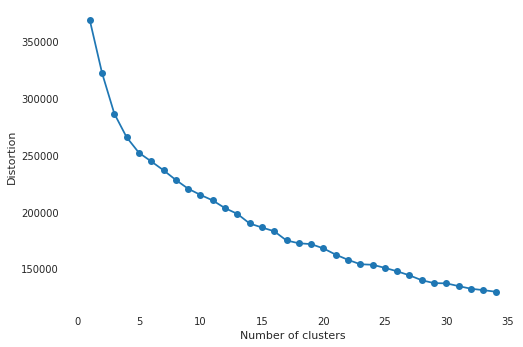

In [ ]:
#Elbow method
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 35):
    print(i)
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=1234
    )
    km.fit(df_kmeans)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 35), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [ ]:
silhouette = [0]
for n in range(2 , 25):
    print(n)
    algorithm = (KMeans(n_clusters = n ,init='random', n_init = 10 , max_iter=300, tol=1e-04,  random_state= 1234) )
    algorithm.fit(df_kmeans)
    labels = algorithm.labels_
    centers = algorithm.cluster_centers_
    silhouette.append(silhouette_score(df_kmeans, labels, metric = 'euclidean'))

plt.figure(1 , figsize = (25 ,6))
plt.plot(np.arange(1 , 25) , silhouette , 'o')
plt.plot(np.arange(1 , 25) , silhouette , '-' , alpha = 0.5)
plt.xlabel('K - Cantidad de grupos') , plt.ylabel('Siloueta')
plt.show()

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


estimators = [('imputer', SimpleImputer(strategy='most_frequent')), 
              ('encoder', OrdinalEncoder()),
              ]
pipe = Pipeline(estimators)
X_mod = pipe.fit_transform(X)
data_mod = pd.DataFrame(X_mod,columns=X.columns)
data_mod.head()
model.fit(X,Y)
pred1 = model.predict(X)
display(pred1)
plot_confusion_matrix(model,X,Y,display_labels=le.classes_,values_format='d')
print('----------Reporte para el Modelo 1----------')
print(classification_report(Y,pred1,target_names=le.classes_))
print('----------Reporte para el Modelo 2----------')
print(classification_report(Y,pred2,target_names=le.classes_))
param_grid = dict(imputer__num__strategy=['mean', 'median'],
                  imputer__cat__strategy=['most_frequent', 'constant'],
                  encoder=[OrdinalEncoder(), OneHotEncoder()],
                  normalize=['passthrough', MaxAbsScaler()])

grid_search = GridSearchCV(pipe, param_grid=param_grid,cv=5,verbose=3,scoring='accuracy')

grid_search.fit(X,Y.ravel())
print(grid_search.best_params_)

dump(grid_search.best_estimator_, 'my_model.joblib') 

model = load('my_model.joblib') 

pred1 = model.predict(X)
print('----------Reporte para el Mejor Modelo----------')
print(classification_report(Y,pred1,target_names=le.classes_))

In [ ]:
#Hyperarameter tunning: algoritmo, K, init, max_iter

In [ ]:
km = KMeans(
    n_clusters=3, init='random',

)
y_km = km.fit_predict(X)

#### Results performance